# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


## PROYECTO FINAL. SPRINT 14.

enlace de archivos del proyecto:

https://drive.google.com/drive/folders/1EZNhhw7L14tqznHsKx4tLQpoVKDuLGRm?usp=drive_link

### OBJETIVO DEL PROYECTO

### "Identificar operadores ineficaces en empresa de Telecomunicaciones"

### Descripcion del problema

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los/las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

**Descripción de los datos**

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

###  1. Definir caracteristicas y expectativas del analisis
    
    Es importante definir los valores que nos indicaran la metrica para poder decir que un operador es ineficiente o no.

    Considerando las actividades que se tomaran en cuenta en el analisis de datos, queda algo asi:
    
    - Operador ineficaz_metrica1 =  gran cantidad de llamadas entrantes perdidas (internas y externas) ; definir numero maximo tolerable durante el analisis de los datos.
    - Operador ineficaz_metrica2 =  tiempo de espera prolongado para las llamadas entrantes; definir numero maximo tolerable durante el analisis de los datos.
    - Operador ineficaz_metrica3 =  número reducido de llamadas salientes; definir numero minimo tolerable durante el analisis de los datos.

###  2. Llevar a cabo el análisis de datos
    - Exportación de datos
    - Preprocesamiento de datos
    - análisis exploratorio de datos

In [1]:
# Cargar librerias
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm

In [2]:
#Cargar archivos de datos
df_dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')
df_clients = pd.read_csv('/datasets/telecom_clients_us.csv')

In [3]:
print('La cantitad total de operadores que estaremos analizando es:')
print(len(df_dataset['operator_id'].unique()))

La cantitad total de operadores que estaremos analizando es:
1093


In [4]:
df_dataset['date'] = pd.to_datetime(df_dataset['date'])
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

In [5]:
#ver cuando empezo el registro de datos y cuando termino
fecha_inicial = df_dataset['date'].min()
fecha_final = df_dataset['date'].max()
dias_totales = (fecha_final - fecha_inicial).days + 1
print("Fecha inicial:", fecha_inicial)
print("Fecha final:", fecha_final)
print("Total de días de registros:", dias_totales)

Fecha inicial: 2019-08-02 00:00:00+03:00
Fecha final: 2019-11-28 00:00:00+03:00
Total de días de registros: 119


In [6]:
print(df_dataset.head(10))

   user_id                      date direction internal  operator_id  \
0   166377 2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377 2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377 2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377 2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377 2019-08-05 00:00:00+03:00       out    False     880022.0   
5   166377 2019-08-05 00:00:00+03:00       out    False     880020.0   
6   166377 2019-08-05 00:00:00+03:00       out    False     880020.0   
7   166377 2019-08-05 00:00:00+03:00        in    False          NaN   
8   166377 2019-08-05 00:00:00+03:00       out    False     880020.0   
9   166377 2019-08-06 00:00:00+03:00        in    False          NaN   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  


In [7]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [8]:
print(df_clients.head(10))

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
5   167764           A  2019-09-30
6   167050           A  2019-08-29
7   168252           A  2019-10-17
8   168495           A  2019-10-28
9   167879           A  2019-10-03


In [9]:
#Revisar cuantos datos nulos hay
print(df_dataset.isnull().sum())

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [10]:
# Total de filas del DataFrame
total_filas = len(df_dataset)

# Porcentaje de valores nulos por columna
porcentaje_nulos = df_dataset.isnull().sum() / total_filas * 100

# Mostrar el resultado ordenado de mayor a menor
print(porcentaje_nulos.sort_values(ascending=False))

operator_id            15.160847
internal                0.217061
user_id                 0.000000
date                    0.000000
direction               0.000000
is_missed_call          0.000000
calls_count             0.000000
call_duration           0.000000
total_call_duration     0.000000
dtype: float64


**Comentario**

Considerando que los datos nulos de la columna internal representan el 0.2% del total, entonces los vamos a eliminar; pero los datos nulos de la columna operator_id son el 15.16% por lo que eliminarlos pudiera impactar en algunos analisis, pero considerando que las metricas que se deasean realizar en este proyecto, esta directamente direccionadas a la eficiencia de los operadores, entonces todos estos datos no tenemos forma de asignarlos a algun o algunos operadores en especifico, por lo que nos estorbarian mas en este caso, asi que los eliminaremos de momento y realizaremos calculos, y despues de ver que resultados se van obteniendo decidiremos si debemos regresar a este punto y recuperar los datos.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Excelente introducción al proyecto! Has planteado con claridad el objetivo, las métricas que se usarán para identificar ineficiencia y la justificación para el tratamiento de los datos nulos. Esta base sólida da muy buen inicio al análisis. </div>


In [11]:
#eliminar datos nulos de columnas
df_dataset = df_dataset[df_dataset['internal'].notna()]
df_dataset = df_dataset[df_dataset['operator_id'].notna()]

df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              45670 non-null  int64                                
 1   date                 45670 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            45670 non-null  object                               
 3   internal             45670 non-null  object                               
 4   operator_id          45670 non-null  float64                              
 5   is_missed_call       45670 non-null  bool                                 
 6   calls_count          45670 non-null  int64                                
 7   call_duration        45670 non-null  int64                                
 8   total_call_duration  45670 non-null  int64                                
dtypes: bool

**comentarios**

Ahora con los datos ya completos, vamos a convertir los tipos de datos para trabajar en nuestros calculos y analisis.

In [12]:
# Convertir columnas 'date' y 'date_start' a tipo fecha
df_dataset['date'] = pd.to_datetime(df_dataset['date'])
df_clients['date_start'] = pd.to_datetime(df_clients['date_start'])

# Convertir columnas a tipo object
df_dataset['user_id'] = df_dataset['user_id'].astype(str)
df_dataset['operator_id'] = df_dataset['operator_id'].astype(int).astype(str)
df_clients['user_id'] = df_clients['user_id'].astype(str)

#convertir columna a tipo boleano
df_dataset['internal'] = df_dataset['internal'].astype(bool)

In [13]:
df_dataset.info()
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              45670 non-null  object                               
 1   date                 45670 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            45670 non-null  object                               
 3   internal             45670 non-null  bool                                 
 4   operator_id          45670 non-null  object                               
 5   is_missed_call       45670 non-null  bool                                 
 6   calls_count          45670 non-null  int64                                
 7   call_duration        45670 non-null  int64                                
 8   total_call_duration  45670 non-null  int64                                
dtypes: bool

In [14]:
df_dataset.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50
8,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50
10,166377,2019-08-06 00:00:00+03:00,out,False,881278,True,3,0,29
11,166377,2019-08-06 00:00:00+03:00,out,False,880020,True,5,0,70
12,166377,2019-08-06 00:00:00+03:00,out,True,881278,True,2,0,5


**Revisar datos sobre llamadas perdidas**

Revisaremos si hay registros de llamadas perdidas con tiempo de llamada; obviamente esto es anormal, pues una llamada perdida es una llamada no contestada, y no deberia tener tiempo registrado.

In [15]:
#ver si hay datos de llamadas perdidas que registran tiempo de llamada
df_missed_calls_with_time = df_dataset[(df_dataset['is_missed_call'] == True) & (df_dataset['call_duration'] > 0)]
print('cantidad de llamadas perdidas que registran duracion de tiempo:', len(df_missed_calls_with_time))
print()
df_missed_calls_with_time.head(10)

cantidad de llamadas perdidas que registran duracion de tiempo: 324



,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1606,166405,2019-11-19 00:00:00+03:00,in,False,939478,True,1,165,173
1635,166405,2019-11-21 00:00:00+03:00,in,False,882686,True,1,1,5
1657,166405,2019-11-22 00:00:00+03:00,in,False,882686,True,1,1,5
2283,166407,2019-09-23 00:00:00+03:00,in,False,888534,True,1,133,156
2869,166482,2019-11-05 00:00:00+03:00,in,False,934074,True,1,1,15
2956,166485,2019-09-09 00:00:00+03:00,in,False,887276,True,1,31,44
3376,166485,2019-10-31 00:00:00+03:00,in,False,887276,True,1,79,123
3975,166503,2019-08-12 00:00:00+03:00,in,True,884408,True,1,38,69
4073,166503,2019-09-25 00:00:00+03:00,in,False,906680,True,1,53,70
4080,166503,2019-09-25 00:00:00+03:00,in,False,884408,True,2,47,84


In [16]:
# Porcentaje de llamadas perdidas que registran tiempo con respecto al total de llamadas registradas
porcentaje_llamadas_con_tiempo = (len(df_missed_calls_with_time) / len(df_dataset['call_duration'])) * 100

# Mostrar el resultado
print(f'Las llamadas perdidas que registran tiempo representan el {porcentaje_llamadas_con_tiempo:.2f}% del total del registro de llamadas.')

Las llamadas perdidas que registran tiempo representan el 0.71% del total del registro de llamadas.


**Comentario**

Considerando que una llamada perdida no deberia mostrar tiempo de llamada, y calculando que su porcentaje es menor al 1% del total, entonces eliminaremos estas filas.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy bien identificado el caso anómalo de llamadas perdidas con duración positiva. Tu enfoque meticuloso para validar la calidad de los datos fortalece la confiabilidad del análisis posterior. Excelente atención a los detalles. </div>


In [17]:
df_dataset = df_dataset.drop(df_missed_calls_with_time.index)

df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45346 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              45346 non-null  object                               
 1   date                 45346 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            45346 non-null  object                               
 3   internal             45346 non-null  bool                                 
 4   operator_id          45346 non-null  object                               
 5   is_missed_call       45346 non-null  bool                                 
 6   calls_count          45346 non-null  int64                                
 7   call_duration        45346 non-null  int64                                
 8   total_call_duration  45346 non-null  int64                                
dtypes: bool

**- Ahora crearemos una columna que indique el tiempo de espera de las llamadas**

Esto se calcula restando los valores de la columna 'total_call_duration' menos 'call_duration'

Esto lo usaremos para determinar el metricos de 'tiempo largo de espera en llamada'

In [18]:
df_dataset['waiting_time'] = df_dataset['total_call_duration'] - df_dataset['call_duration']

df_dataset.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29,26
6,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50,50
8,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50,50
10,166377,2019-08-06 00:00:00+03:00,out,False,881278,True,3,0,29,29
11,166377,2019-08-06 00:00:00+03:00,out,False,880020,True,5,0,70,70
12,166377,2019-08-06 00:00:00+03:00,out,True,881278,True,2,0,5,5


**Empezaremos sacando medias, medianas y datos generales**

In [19]:
df_dataset.describe()

,calls_count,call_duration,total_call_duration,waiting_time
count,45346.000000,45346.000000,45346.000000,45346.000000
mean,17.034512,1017.596591,1332.421338,314.824747
std,59.277620,4030.637385,4751.082537,1178.841994
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,69.000000,19.000000
50%,4.000000,109.000000,296.000000,61.000000
75%,14.000000,785.750000,1124.000000,223.000000
max,4817.000000,144395.000000,166155.000000,46474.000000


In [20]:
#calcular cuantos operadores hay en total
print('La cantitad total de operadores que estaremos analizando es:')
print(len(df_dataset['operator_id'].unique()))

La cantitad total de operadores que estaremos analizando es:
1092


**comentarios**

viendo los valores maximos se aprecian datos muy grandes, parecen datos atipicos, vamos a analizarlos con mas detalle para ver como los manejaremos. 

**- Comenzaremos con el analisis para la primer metrica "gran cantidad de llamadas entrantes perdidas (internas y externas)"**

Analizaremos la cantidad de llamadas perdidas por dia para establecer metas y limites permisibles antes de considerar al operador ineficiente.

### Paso 1: Filtrar llamadas entrantes y perdidas

In [21]:
df_filtrado = df_dataset[
    (df_dataset['direction'] == 'in') &
    (df_dataset['is_missed_call'] == True)]

### Paso 2: Cantidad de llamadas perdidas por usuario y día

In [22]:
# Asegurarse de tener la fecha como solo día
df_filtrado = df_filtrado.copy()
df_filtrado.loc[:, 'fecha'] = df_filtrado['date'].dt.date
# Agrupar por usuario y día
df_por_dia = df_filtrado.groupby(['operator_id', 'fecha'])['calls_count'].sum().reset_index()

df_por_dia_ordenada = df_por_dia.sort_values(by='calls_count', ascending=False)

print(df_por_dia_ordenada)

    operator_id       fecha  calls_count
380      944226  2019-11-08           16
113      905862  2019-10-04           13
286      937956  2019-10-17           11
408      959312  2019-11-18            7
330      940658  2019-11-26            6
..          ...         ...          ...
148      912296  2019-10-03            1
147      912010  2019-10-09            1
146      912010  2019-09-19            1
145      911310  2019-11-03            1
409      960620  2019-11-28            1

[410 rows x 3 columns]


In [23]:
df_por_dia.describe()

,calls_count
count,410.000000
mean,1.404878
std,1.299605
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


In [24]:
print('La mediana de los datos es:')
print(df_por_dia['calls_count'].median())

La mediana de los datos es:
1.0


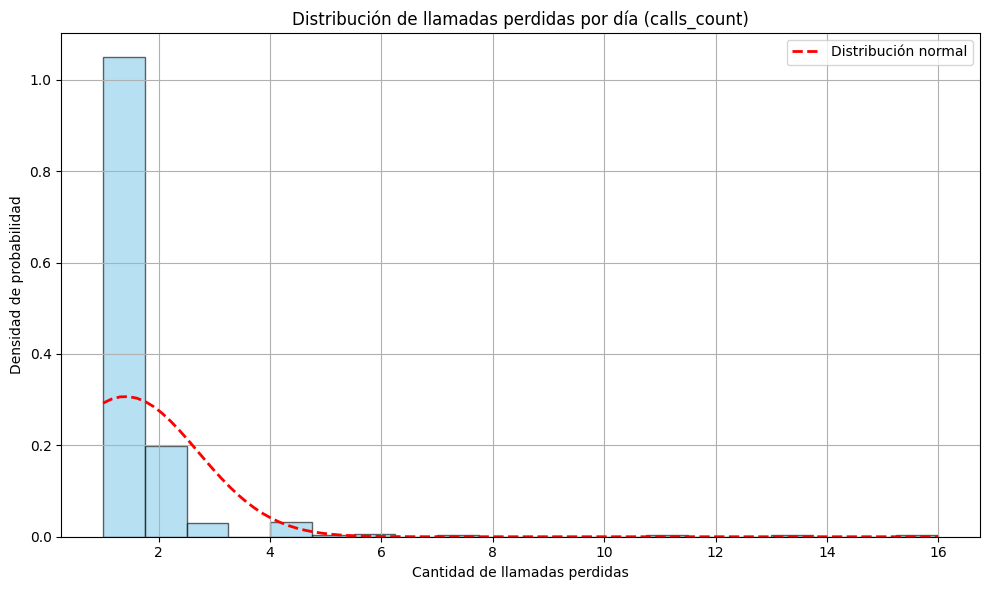

In [25]:
# Extraer los datos
data1 = df_por_dia['calls_count']

# Calcular media y desviación estándar
mu, std = data1.mean(), data1.std()

# Crear el histograma de los datos reales
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data1, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Generar la curva de distribución normal
xmin, xmax = min(bins), max(bins)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', linewidth=2, label='Distribución normal')

# Títulos y leyenda
plt.title('Distribución de llamadas perdidas por día (calls_count)')
plt.xlabel('Cantidad de llamadas perdidas')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Comentario**

Viendo la grafica y la distribuion; podemos considerar como limite maximo tolerable el numero 6, como maximo de llamadas perdidas diarias, si queremos abarcar los valores dentro de la campana de la distribucion; pero si quisieramos ser mas estrictos podriamos tomar el dato de la media de 1.4 mas la desviacion estandar de 1.2, por lo que eso nos daria un valor maximo de 3 llamadas perdidas tolerables por dia.

Consideremos la segunda opcion que es un poco mas estricta, tomaremos a partir de 3 llamadas perdidas, entonces calcularemos la cantidad de operadores que estan igual y por encimma de este valor diario, y los enlistaremos.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Estás aplicando un enfoque riguroso y bien fundamentado para definir límites operativos mediante estadística descriptiva y visualización. La elección de un umbral estricto basado en la media y desviación estándar muestra una gran capacidad analítica. Sigue así, tu razonamiento es sólido. </div>


### Paso 3: identificar operadores que estan por encima del valor de la metrica establecida

In [26]:
lista_operadores_ineficientes_metrica_1 = df_por_dia[df_por_dia['calls_count'] >= 3]
operadores_excedidos = lista_operadores_ineficientes_metrica_1['operator_id'].nunique()

print('La cantidad de operadores que exceden el límite diario permitido de llamadas perdidas es:', operadores_excedidos)

lista_operadores_ineficientes_metrica_1.head(30)

La cantidad de operadores que exceden el límite diario permitido de llamadas perdidas es: 18


,operator_id,fecha,calls_count
13,885876,2019-08-19,3
34,885890,2019-09-16,3
110,905300,2019-09-12,3
111,905300,2019-10-09,3
113,905862,2019-10-04,13
124,906410,2019-10-07,4
194,919204,2019-10-01,3
195,919204,2019-10-02,3
220,921814,2019-09-27,4
242,926872,2019-10-28,3


In [27]:
df_exceso = df_por_dia[df_por_dia['calls_count'] >= 3]
df_dias_excedidos = df_exceso.groupby('operator_id').size().reset_index(name='dias_limite_excedido')
#print(df_dias_excedidos.head(30))
print(df_dias_excedidos.sort_values(by='dias_limite_excedido', ascending=False).head(30))

   operator_id  dias_limite_excedido
9       937956                     3
15      944226                     3
2       905300                     2
16      948286                     2
5       919204                     2
12      944216                     2
10      937958                     1
14      944222                     1
13      944220                     1
11      940658                     1
0       885876                     1
1       885890                     1
8       931458                     1
7       926872                     1
6       921814                     1
4       906410                     1
3       905862                     1
17      959312                     1


**COMENTARIO**

con los datos filtrados podemos identificar que operadores tienen mas de 3 llamadas perdidas en un dia, y cuantos dias excedieron este limite.

## Ahora analizaremos la segunda metrica que es "tiempo de espera prolongado para las llamadas entrantes"

In [28]:
#revision de datos
df_dataset.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29,26
6,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50,50
8,166377,2019-08-05 00:00:00+03:00,out,False,880020,True,8,0,50,50
10,166377,2019-08-06 00:00:00+03:00,out,False,881278,True,3,0,29,29
11,166377,2019-08-06 00:00:00+03:00,out,False,880020,True,5,0,70,70
12,166377,2019-08-06 00:00:00+03:00,out,True,881278,True,2,0,5,5


In [29]:
df_dataset.describe()

,calls_count,call_duration,total_call_duration,waiting_time
count,45346.000000,45346.000000,45346.000000,45346.000000
mean,17.034512,1017.596591,1332.421338,314.824747
std,59.277620,4030.637385,4751.082537,1178.841994
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,69.000000,19.000000
50%,4.000000,109.000000,296.000000,61.000000
75%,14.000000,785.750000,1124.000000,223.000000
max,4817.000000,144395.000000,166155.000000,46474.000000


**comentario**

Para este analisis vemos que la media y la desviacion estandar en el tiempo de espera es muy alto, y por lo que se ve en el valor maximo tenemos una cantidad muy alta de 46474 segundos, este parece un valor atipico, realizaremos analisis y calculos para manejar estos datos.

### Primero analizaremos el comportamiento de tiempos de espera en llamadas entrantes perdidas

In [30]:
# hacer data frame filtrando solo las llamadas entrantes
df_filtrado2 = df_dataset[(df_dataset['direction'] == 'in')]

llamadas_perdidas = (df_filtrado2['is_missed_call'] == True).sum()
print("Llamadas perdidas:", llamadas_perdidas)
llamadas_no_perdidas = (df_filtrado2['is_missed_call'] == False).sum()
print("Llamadas no perdidas:", llamadas_no_perdidas)
df_filtrado2.head(10)

Llamadas perdidas: 443
Llamadas no perdidas: 13210


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
26,166377,2019-08-12 00:00:00+03:00,in,False,880028,False,1,407,411,4
34,166377,2019-08-13 00:00:00+03:00,in,False,880028,False,1,88,102,14
37,166377,2019-08-14 00:00:00+03:00,in,False,880026,False,2,197,218,21
39,166377,2019-08-14 00:00:00+03:00,in,False,880028,False,1,33,37,4
49,166377,2019-08-15 00:00:00+03:00,in,False,880028,False,1,23,27,4
60,166377,2019-08-19 00:00:00+03:00,in,False,880028,False,1,21,39,18
66,166377,2019-08-20 00:00:00+03:00,in,False,880028,False,1,30,33,3
76,166377,2019-08-22 00:00:00+03:00,in,False,880020,False,1,33,49,16
79,166377,2019-08-23 00:00:00+03:00,in,False,880026,False,1,45,52,7
82,166377,2019-08-23 00:00:00+03:00,in,False,880028,False,1,41,54,13


In [31]:
#crear dataframe de puras llamadas perdidas
df_llamadas_perdidas = df_filtrado2[df_filtrado2['is_missed_call'] == True]
df_llamadas_perdidas.describe()

,calls_count,call_duration,total_call_duration,waiting_time
count,443.000000,443.0,443.000000,443.000000
mean,1.300226,0.0,29.489842,29.489842
std,1.060468,0.0,53.224248,53.224248
min,1.000000,0.0,1.000000,1.000000
25%,1.000000,0.0,7.000000,7.000000
50%,1.000000,0.0,16.000000,16.000000
75%,1.000000,0.0,33.500000,33.500000
max,13.000000,0.0,678.000000,678.000000


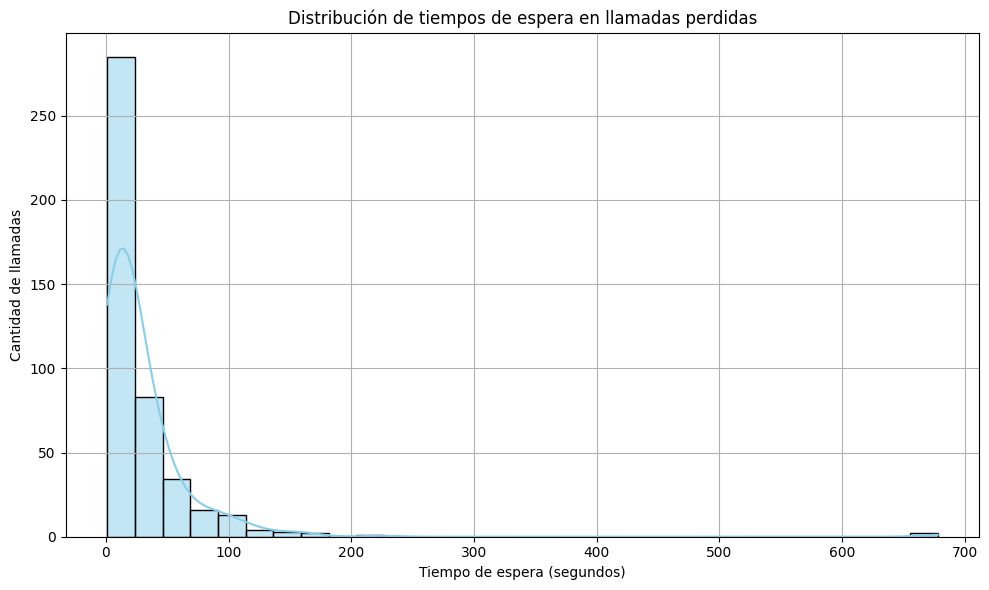

In [32]:
#hacer histograma con linea de distribucion
plt.figure(figsize=(10, 6))
sns.histplot(data=df_llamadas_perdidas, x='waiting_time', kde=True, bins=30, color='skyblue')

plt.title('Distribución de tiempos de espera en llamadas perdidas')
plt.xlabel('Tiempo de espera (segundos)')
plt.ylabel('Cantidad de llamadas')
plt.grid(True)
plt.tight_layout()
plt.show()

### Ahora analizaremos el comportamiento del tiempo de espera en llamadas entrantes contestadas

In [33]:
#crear dataframe de puras llamadas contestadas
df_llamadas_contestadas = df_filtrado2[df_filtrado2['is_missed_call'] == False]
df_llamadas_contestadas.describe()

,calls_count,call_duration,total_call_duration,waiting_time
count,13210.000000,13210.000000,13210.000000,13210.000000
mean,7.768433,793.703028,895.264194,101.561166
std,15.471641,1516.158922,1630.739872,189.082603
min,1.000000,1.000000,3.000000,0.000000
25%,1.000000,81.000000,109.000000,17.000000
50%,3.000000,296.000000,345.000000,41.000000
75%,8.000000,900.000000,1007.750000,102.000000
max,273.000000,33897.000000,34280.000000,3998.000000


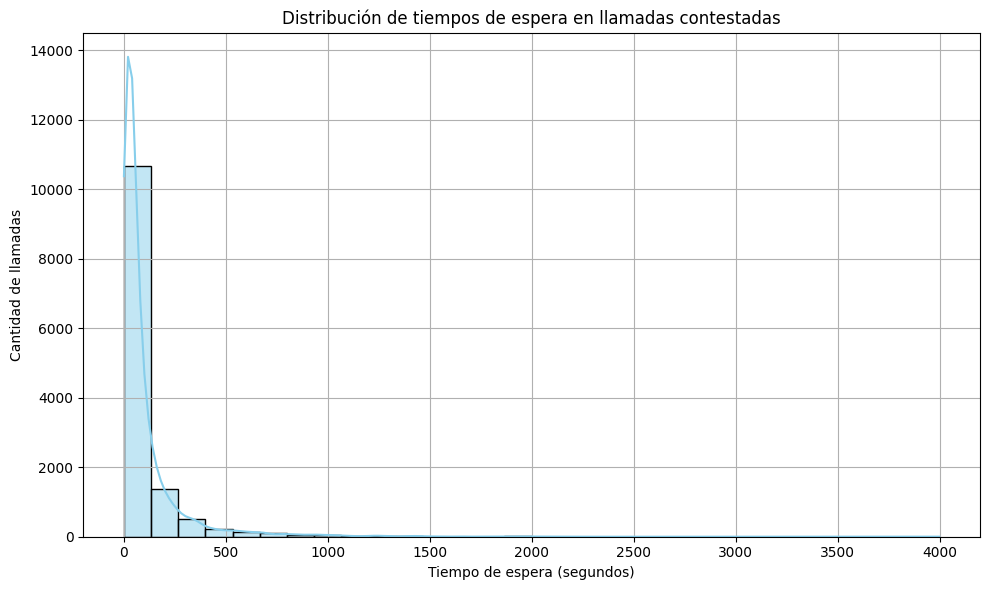

In [34]:
#hacer histograma con linea de distribucion
plt.figure(figsize=(10, 6))
sns.histplot(data=df_llamadas_contestadas, x='waiting_time', kde=True, bins=30, color='skyblue')

plt.title('Distribución de tiempos de espera en llamadas contestadas')
plt.xlabel('Tiempo de espera (segundos)')
plt.ylabel('Cantidad de llamadas')
plt.grid(True)
plt.tight_layout()
plt.show()

**Comentario**

Los tiempos de espera pueden variar y ser afectados por diferentes factores, uno de ellos puede ser por falta de operadores disponibles para contestar la llamada; aun asi, despues de analizar los tiempos de espera por separado tanto en llamadas perdidas y llamadas contestadas, podemos ver que en las llamadas perdidas el tiempo de espera promedio es de casi 30 segundos, esto puede indicar que los usuarios no son muy pacientes, ya que viendo la media de espera en llamadas contestadas estamos viendo 101 segundos de espera.

Tambien, viendo los cuartiles para las llamadas contestadas, podemos ver que en el 75% tenemos 102 segundos de espera; y viendo el grafico con la distribucion, podemos establecer un limite maximo de espera de 120 segundos para pode clasificar que el operador es ineficiente.

In [35]:
lista_operadores_ineficientes_metrica_2 = df_filtrado2[df_filtrado2['waiting_time'] >= 120]
operadores_excedidos2 = lista_operadores_ineficientes_metrica_2['operator_id'].nunique()

print('La cantidad de operadores que exceden el límite de tiempo de espera por llamada es:', operadores_excedidos2)

lista_operadores_ineficientes_metrica_2.head(30)

La cantidad de operadores que exceden el límite de tiempo de espera por llamada es: 255


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
638,166392,2019-10-08 00:00:00+03:00,in,False,891906,False,5,1196,1340,144
649,166392,2019-10-21 00:00:00+03:00,in,False,891900,False,6,734,952,218
660,166392,2019-10-29 00:00:00+03:00,in,False,891900,False,5,368,539,171
685,166392,2019-11-20 00:00:00+03:00,in,False,891906,False,5,708,836,128
689,166392,2019-11-25 00:00:00+03:00,in,False,891906,False,6,547,715,168
756,166405,2019-08-19 00:00:00+03:00,in,False,882686,False,32,6617,6910,293
763,166405,2019-08-19 00:00:00+03:00,in,False,882684,False,19,1832,2039,207
768,166405,2019-08-20 00:00:00+03:00,in,False,882686,False,27,5800,6194,394
770,166405,2019-08-20 00:00:00+03:00,in,False,882684,False,24,3215,3489,274
773,166405,2019-08-21 00:00:00+03:00,in,False,882686,False,16,2779,2899,120


In [36]:
df_tiempo_espera_excedidos = lista_operadores_ineficientes_metrica_2.groupby('operator_id').size().reset_index(name='llamadas_tiempo_espera_excedido')
#print(df_tiempo_espera_excedidos.head(30))
print(df_tiempo_espera_excedidos.sort_values(by='llamadas_tiempo_espera_excedido', ascending=False).head(30))

    operator_id  llamadas_tiempo_espera_excedido
130      919552                               70
99       908958                               70
131      919554                               68
100      908960                               67
132      919790                               62
115      913938                               61
32       893804                               57
10       885890                               56
148      921818                               56
47       899082                               55
116      913942                               54
133      919792                               53
11       887276                               51
114      913788                               51
146      921318                               48
89       906406                               47
88       906404                               42
200      939762                               41
161      931458                               40
216      944220     

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Estás aplicando criterios estadísticos con mucha precisión para establecer umbrales significativos y detectar ineficiencia operativa. El desglose por operador y los análisis por separado de llamadas perdidas y contestadas muestran un enfoque profundo y profesional. Excelente trabajo. </div>


### Ahora analizaremos la tercer metrica que es "número reducido de llamadas salientes"

### Paso 1: Filtrar llamadas salientes y agrupar por dia

In [37]:
# hacer data frame filtrando solo las llamadas salientes
df_filtrado3 = df_dataset[(df_dataset['direction'] == 'out')]

# Asegurarse de tener la fecha como solo día
df_filtrado3 = df_filtrado3.copy()
df_filtrado3.loc[:, 'fecha'] = df_filtrado3['date'].dt.date
# Agrupar por usuario y día
df_por_dia3 = df_filtrado3.groupby(['operator_id', 'fecha'])['calls_count'].sum().reset_index()

df_por_dia_ordenada = df_por_dia3.sort_values(by='calls_count', ascending=False)

print(df_por_dia_ordenada)

      operator_id       fecha  calls_count
10666      929428  2019-11-11         5022
772        885876  2019-10-01         3962
764        885876  2019-09-23         2894
751        885876  2019-09-10         2824
10659      929428  2019-10-31         2730
...           ...         ...          ...
12649      940460  2019-11-22            1
3931       900594  2019-11-04            1
3934       900594  2019-11-12            1
8931       920666  2019-11-13            1
3712       900352  2019-09-17            1

[15112 rows x 3 columns]


In [38]:
df_por_dia3.describe()

,calls_count
count,15112.000000
mean,44.285998
std,140.849574
min,1.000000
25%,3.000000
50%,11.000000
75%,38.000000
max,5022.000000


In [39]:
print('la mediana de las llamadas salientes es:')
print(df_por_dia3['calls_count'].median())

la mediana de las llamadas salientes es:
11.0


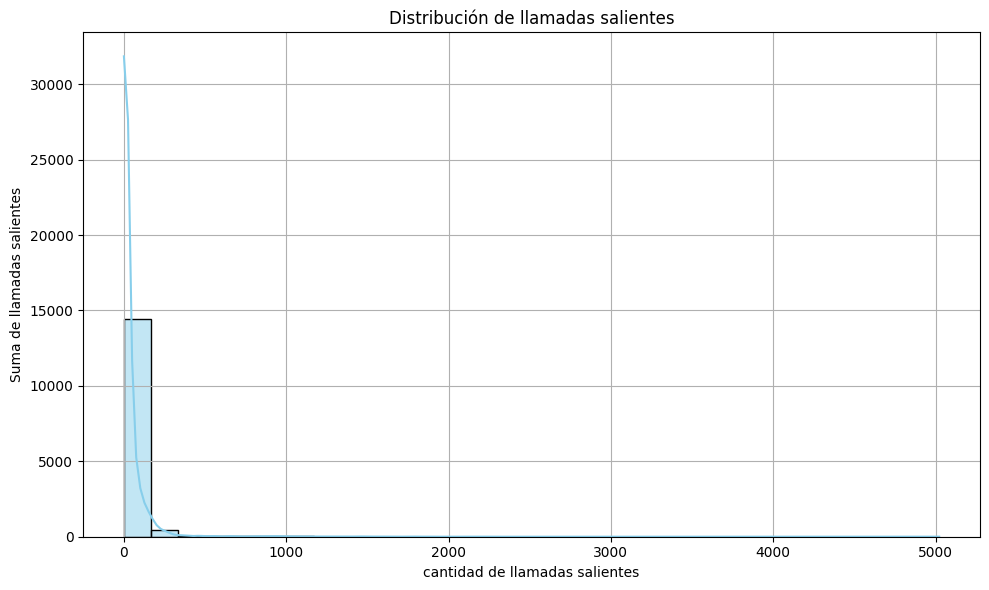

In [40]:
#hacer histograma con linea de distribucion
plt.figure(figsize=(10, 6))
sns.histplot(data=df_por_dia3, x='calls_count', kde=True, bins=30, color='skyblue')

plt.title('Distribución de llamadas salientes')
plt.xlabel('cantidad de llamadas salientes')
plt.ylabel('Suma de llamadas salientes')
plt.grid(True)
plt.tight_layout()
plt.show()

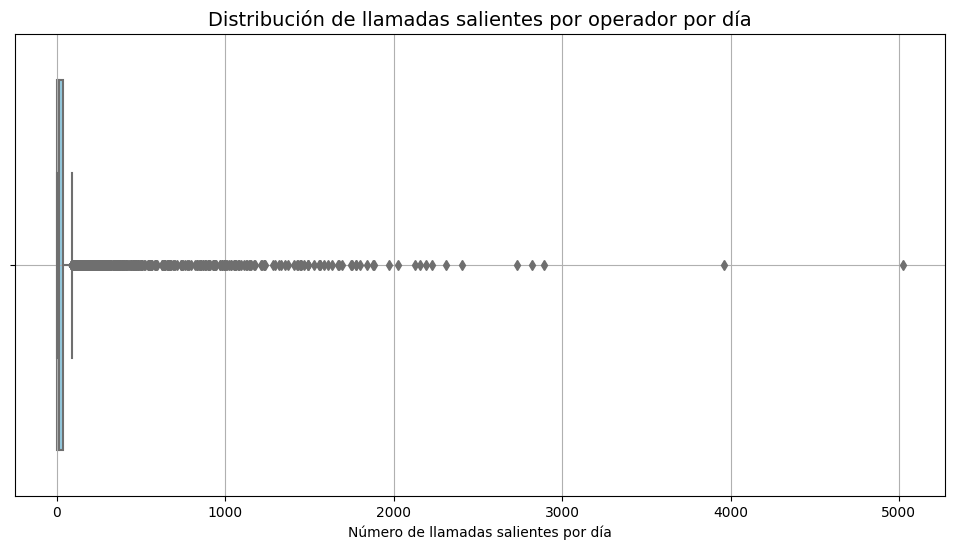

In [41]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear boxplot
sns.boxplot(x=df_por_dia3['calls_count'], color='skyblue')

# Títulos y etiquetas
plt.title('Distribución de llamadas salientes por operador por día', fontsize=14)
plt.xlabel('Número de llamadas salientes por día')

# Mostrar gráfico
plt.grid(True)
plt.show()

**Comentario**

Podemos observar que hay valores atipicos muy exagerados para las llamadas salientes; de entrada vemos que la mediana es 11 y la media es 44, esto es debido a estos datos outliers; considerando el cuatril del 75% con 38, filtremos todos los datos que esten por encima de este numero y analicemos de nuevo los datos.

In [42]:
df_llammadas_diarias = df_por_dia3[df_por_dia3['calls_count'] <= 38]

df_llammadas_diarias.describe()

,calls_count
count,11412.000000
mean,10.168507
std,9.886176
min,1.000000
25%,2.000000
50%,6.000000
75%,15.000000
max,38.000000


**comentario**

Con este filtrado, la media se mueve a 10 llamadas salientes aproximadamente; y la mediana se coloca en el cuartil de 50% con 6 llamadas, por lo que podemos tomas este valor como minimo para poder decir que algun operador es ineficiente en llamadas salientes.

In [43]:
lista_operadores_ineficientes_metrica_3 = df_por_dia3[df_por_dia3['calls_count'] <= 6]
operadores_excedidos3 = lista_operadores_ineficientes_metrica_3['operator_id'].nunique()

print('La cantidad de operadores que no alcanzan el minimo de llamadas salientes por dia es:', operadores_excedidos3)
print()
print('lista de operadores con fecha que no han alcanzado el minimo de llamadas salientes')
#lista_operadores_ineficientes_metrica_3.head(30)
print(lista_operadores_ineficientes_metrica_3.sort_values(by='calls_count', ascending=False).head(30))

La cantidad de operadores que no alcanzan el minimo de llamadas salientes por dia es: 741

lista de operadores con fecha que no han alcanzado el minimo de llamadas salientes
      operator_id       fecha  calls_count
5767       905844  2019-09-20            6
2220       891160  2019-09-12            6
9967       924950  2019-10-21            6
9977       924950  2019-10-31            6
5854       905930  2019-10-04            6
7573       914052  2019-10-26            6
7564       914052  2019-10-17            6
5846       905930  2019-09-13            6
2209       891158  2019-11-19            6
5839       905870  2019-10-02            6
5817       905844  2019-11-21            6
2222       891160  2019-09-19            6
10041      924954  2019-11-23            6
13105      944226  2019-11-13            6
5782       905844  2019-10-06            6
5769       905844  2019-09-22            6
5765       905844  2019-09-18            6
5739       905842  2019-10-26            6
5719     

In [44]:
#hacerlista de operadores que no han alcanzado el minimo de llamadas salientes al menos en una ocasion
df_llamadas_salientes_excedidos = lista_operadores_ineficientes_metrica_3.groupby('operator_id').size().reset_index(name='dias_sin_alcanzar_minimo_llamadas_salientes')
#print(df_llamadas_salientes_excedidos)
print(df_llamadas_salientes_excedidos.sort_values(by='dias_sin_alcanzar_minimo_llamadas_salientes', ascending=False).head(30))

    operator_id  dias_sin_alcanzar_minimo_llamadas_salientes
101      896008                                           56
304      918390                                           53
144      900894                                           52
58       891158                                           51
226      907952                                           50
173      904038                                           50
61       891166                                           48
149      901584                                           45
228      907970                                           44
55       891152                                           43
33       888532                                           43
104      896016                                           41
142      900826                                           41
34       888534                                           39
133      900492                                           39
201      906296         

In [47]:
#ordenar la lista de mayor a menor
df_llamadas_salientes_ordenada = df_llamadas_salientes_excedidos.sort_values(by='dias_sin_alcanzar_minimo_llamadas_salientes', ascending=False)

print(df_llamadas_salientes_ordenada)

    operator_id  dias_sin_alcanzar_minimo_llamadas_salientes
101      896008                                           56
304      918390                                           53
144      900894                                           52
58       891158                                           51
226      907952                                           50
..          ...                                          ...
65       891252                                            1
64       891250                                            1
557      940610                                            1
318      919190                                            1
740      973120                                            1

[741 rows x 2 columns]


### Ahora podemos hacer una lista de los operadores que estan presentes en las 3 metricas

In [48]:
df_metrica1 = df_dias_excedidos        # operadores con llamadas perdidas
df_metrica2 = df_tiempo_espera_excedidos            # operadores con tiempo de espera largo
df_metrica3 = df_llamadas_salientes_ordenada # operadores con pocas llamadas salientes

# Obtener conjuntos de operator_id de cada métrica
operadores_m1 = set(df_metrica1['operator_id'])
operadores_m2 = set(df_metrica2['operator_id'])
operadores_m3 = set(df_metrica3['operator_id'])

# Intersección: operadores que aparecen en los tres
operadores_ineficientes = operadores_m1 & operadores_m2 & operadores_m3

# Mostrar resultados
print("Operadores ineficientes (en las 3 métricas):", operadores_ineficientes)
print("Cantidad total:", len(operadores_ineficientes))

# Convertir el set a un DataFrame
df_ineficientes = pd.DataFrame(list(operadores_ineficientes), columns=['operator_id'])

# Mostrar los primeros 15
print(df_ineficientes.head(15))

Operadores ineficientes (en las 3 métricas): {'885876', '944220', '931458', '944216', '919204', '944222', '944226', '885890', '906410', '905862'}
Cantidad total: 10
  operator_id
0      885876
1      944220
2      931458
3      944216
4      919204
5      944222
6      944226
7      885890
8      906410
9      905862


In [49]:
# Crear un DataFrame con todos los operator_id únicos en las 3 métricas
todos_operadores = pd.Series(
    list(
        set(df_metrica1['operator_id']) |
        set(df_metrica2['operator_id']) |
        set(df_metrica3['operator_id'])
    ),
    name='operator_id'
).to_frame()

# Agregar una columna para cada métrica con True/False si aparece o no
todos_operadores['metrica_1_llamadas_perdidas'] = todos_operadores['operator_id'].isin(df_metrica1['operator_id'])
todos_operadores['metrica_2_espera_larga'] = todos_operadores['operator_id'].isin(df_metrica2['operator_id'])
todos_operadores['metrica_3_baja_salida'] = todos_operadores['operator_id'].isin(df_metrica3['operator_id'])

# Agregar columna total de métricas en las que aparece
todos_operadores['conteo_métricas'] = (
    todos_operadores[['metrica_1_llamadas_perdidas', 'metrica_2_espera_larga', 'metrica_3_baja_salida']]
    .sum(axis=1)
)

# Ordenar por los más ineficientes (mayor número de métricas fallidas)
todos_operadores = todos_operadores.sort_values(by='conteo_métricas', ascending=False)

# Mostrar resultados
print('la cantidad de operadores con registros de ineficiencia es: ', todos_operadores['operator_id'].nunique())
todos_operadores.head(15)

la cantidad de operadores con registros de ineficiencia es:  808


,operator_id,metrica_1_llamadas_perdidas,metrica_2_espera_larga,metrica_3_baja_salida,conteo_métricas
132,919204,True,True,True,3
631,885876,True,True,True,3
787,906410,True,True,True,3
225,944222,True,True,True,3
315,944216,True,True,True,3
511,944226,True,True,True,3
526,905862,True,True,True,3
200,944220,True,True,True,3
569,931458,True,True,True,3
267,885890,True,True,True,3


# CONCLUSION

Ya hemos analizado las 3 metricas y podemos sugerir los limites tolerables de la siguiente forma:

    - Operador ineficaz_metrica1 =  3 llamadas entrantes perdidas (internas y externas) por dia 

    - Operador ineficaz_metrica2 =  120 segundos maximo de tiempo de espera para las llamadas entrantes
    
    - Operador ineficaz_metrica3 =  6 llamadas salientes minimo

Ademas hemos enlistado a los operadores que resultaron infeicientes para cada metrica, y que no cumplieron la meta mas de una vez en el transcurso de los dias.

Y por ultimo hicimos una tabla que nos muestra a todos los operadores que entraron a la categoria de ineficientes, y con las columnas de cada metrica, mostrandonos que operadores estan en una, dos o las tres metricas de ineficiencia.

Despues de identificar a los operadores con ineficiencias en su trabajo, es importante revisar las posibles causas de lo sucedido antes de tomar medidas drasticas; pero lo que si es sugerible hacer, si es que no existia anteriormente, es definir las metricas diarias o mensuales para cada caso, y hacerlo saber a todos los operadores; incluso en sus mismas computadores se les pueden poner mensajes automaticos monitoreando sus metricas para ayudarlos o notificarles cuando aun les faltan llamadas por hacer, o que ya han cumplido la metrica del dia o simplemente al final del turno mostrarles un resumen de sus metricos, para que ellos mismos puedan saber como les fue, y asi cada dia motivarse a mejorar y cumplir satisfactoriamente con las metricas.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - ¡Qué gran cierre de análisis! El trabajo de consolidar los resultados, definir criterios claros y proponer mejoras prácticas es excelente. La propuesta de retroalimentación directa a los operadores muestra una visión orientada a la acción y la mejora continua. Muy bien estructurado y analíticamente sólido. </div>


## Comentario general del revisor 



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades Enrique! Tu proyecto está <b>aprobado</b>. Has demostrado un excelente manejo de los datos, análisis exploratorio, y aplicación de métricas para evaluar el desempeño de operadores. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:

* **Procesamiento de datos:** Excelente tratamiento de valores nulos, detección de inconsistencias y conversión de tipos adecuados.
* **Visualización y análisis gráfico:** Uso efectivo de histogramas, boxplots y distribución normal para establecer umbrales realistas y sólidos.
* **Ingeniería de características:** El cálculo del tiempo de espera es una adición clave para entender mejor el comportamiento de las llamadas.
* **Comparación de métricas:** Muy buena integración de condiciones operativas para identificar ineficiencia y combinar múltiples criterios en una tabla resumen clara.

#### Áreas para Seguir Investigando:

* **Vectorización y optimización de código:** Podrías explorar el uso de funciones vectorizadas para optimizar algunos pasos de agrupación y filtrado.
* **Técnicas avanzadas de feature engineering:** Incorporar tasas de conversión por operador o estacionalidad de llamadas podría enriquecer el análisis.
* **Evaluación de modelos más complejos:** Si en el futuro deseas predecir ineficiencia, podrías entrenar modelos supervisados con estas métricas.
* **Manejo de desbalanceo en los datos:** Si los casos de ineficiencia son pocos, técnicas como SMOTE pueden ayudar en análisis predictivos.

¡Estás haciendo un gran trabajo!  </div>
